# Average EHR Spending by City

In [242]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats
import seaborn as sns

In [243]:
## Load the datasets
df_ehr_provider = pd.read_csv('EHR_Incentive_Program_Payments_Providers.csv')
df_ehr_hospital = pd.read_csv('EHR_Incentive_Program_Payments_Hospitals.csv')
df_city_revenue = pd.read_csv('City_Revenues_Per_Capita.csv')
df_city_expenditure = pd.read_csv('City_Expenditures_Per_Capita.csv')

## Analysis for EHR per Capita for Individual Healthcare Providers

In [244]:
# clean the noisy data
df_ehr_hospital = df_ehr_hospital.drop(df_ehr_hospital.columns[0:7], axis=1)
df_ehr_hospital = df_ehr_hospital.drop(df_ehr_hospital.columns[[1,2,3,4,5,6,8,9,10,11,12]], axis=1)
#df_EHR = df_EHR.drop(['Payment__1','Payment_Cr','Payee_Name','Payee_NPI','total_rece','Latitude','Longitude','Program_Ye'],axis=1)
df_ehr_hospital = df_ehr_hospital.dropna()
df_ehr_hospital.head()

,Business_City,total_payments,Last_Payment_Year
0,Eureka,1530950.70,2016
1,Hayward,3245920.28,2016
2,Napa,1262015.89,2016
3,Jackson,865130.13,2019
4,San Francisco,984465.12,2019


In [245]:
## group the practitioner data by city and year, then sum the total payments
df_ehr_hospital['Business_City'] = df_ehr_hospital['Business_City'].str.lower()
df_ehr_hospital = df_ehr_hospital.groupby(['Business_City','Last_Payment_Year'])['total_payments'].sum().reset_index()
df_ehr_hospital.to_csv('test_group_by_check.csv')
df_ehr_hospital.head()

,Business_City,Last_Payment_Year,total_payments
0,alameda,2013,757172.90
1,alhambra,2016,1403667.18
2,alturas,2019,797141.17
3,anaheim,2015,1178754.07
4,anaheim,2016,5007791.81


In [246]:
#change all Entity Names to lower case
df_city_revenue['Entity Name'] = df_city_revenue['Entity Name'].str.lower()
df_city_revenue.head()

,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2021,22556106,36569.0,617.0
1,adelanto,2020,20455012,35663.0,574.0
2,adelanto,2019,20232000,35136.0,576.0
3,adelanto,2018,18224861,35293.0,516.0
4,adelanto,2017,15171753,34273.0,443.0


In [247]:
df_city_expenditure['Entity Name'] = df_city_revenue['Entity Name'].str.lower()
df_city_expenditure.head()

,Entity Name,Fiscal Year,Total Expenditures,Estimated Population,Expenditures Per Capita
0,adelanto,2021,20580944,36569.0,563.0
1,adelanto,2020,26376314,35663.0,740.0
2,adelanto,2019,30886709,35136.0,879.0
3,adelanto,2018,20531571,35293.0,582.0
4,adelanto,2017,16035685,34273.0,468.0


In [248]:
## merge the provider dataset with the city revenue dataset
df_hospital_city = df_ehr_hospital.merge(df_city_revenue, how="inner",left_on=['Business_City','Last_Payment_Year'],right_on=['Entity Name','Fiscal Year'])
df_hospital_city.head()

,Business_City,Last_Payment_Year,total_payments,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,alameda,2013,757172.90,alameda,2013,166123124,75126.0,2211.0
1,alhambra,2016,1403667.18,alhambra,2016,115993675,86782.0,1337.0
2,alturas,2019,797141.17,alturas,2019,5008239,2755.0,1818.0
3,anaheim,2015,1178754.07,anaheim,2015,1315642721,351433.0,3744.0
4,anaheim,2016,5007791.81,anaheim,2016,1177907888,358136.0,3289.0


In [249]:
## drop the duplicate columns
df_hospital_city = df_hospital_city.drop(['Entity Name','Fiscal Year'], axis=1)
df_hospital_city.head()

,Business_City,Last_Payment_Year,total_payments,Total Revenues,Estimated Population,Revenues Per Capita
0,alameda,2013,757172.90,166123124,75126.0,2211.0
1,alhambra,2016,1403667.18,115993675,86782.0,1337.0
2,alturas,2019,797141.17,5008239,2755.0,1818.0
3,anaheim,2015,1178754.07,1315642721,351433.0,3744.0
4,anaheim,2016,5007791.81,1177907888,358136.0,3289.0


In [250]:
## merge with the city expenditure dataset
df_hospital_city = df_hospital_city.merge(df_city_expenditure, how="inner",left_on=['Business_City','Last_Payment_Year', 'Estimated Population'],right_on=['Entity Name','Fiscal Year', 'Estimated Population'])
df_hospital_city = df_hospital_city.drop(['Entity Name','Fiscal Year'], axis=1)
df_hospital_city.head()

,Business_City,Last_Payment_Year,total_payments,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita
0,alameda,2013,757172.90,166123124,75126.0,2211.0,157177102,2092.0
1,alhambra,2016,1403667.18,115993675,86782.0,1337.0,108343335,1248.0
2,alturas,2019,797141.17,5008239,2755.0,1818.0,5382306,1954.0
3,anaheim,2015,1178754.07,1315642721,351433.0,3744.0,1360977806,3873.0
4,anaheim,2016,5007791.81,1177907888,358136.0,3289.0,1184264881,3307.0


In [251]:
df_hospital_city.to_csv('ultimate_test.csv')

In [252]:
df_hospital_city.head()

,Business_City,Last_Payment_Year,total_payments,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita
0,alameda,2013,757172.90,166123124,75126.0,2211.0,157177102,2092.0
1,alhambra,2016,1403667.18,115993675,86782.0,1337.0,108343335,1248.0
2,alturas,2019,797141.17,5008239,2755.0,1818.0,5382306,1954.0
3,anaheim,2015,1178754.07,1315642721,351433.0,3744.0,1360977806,3873.0
4,anaheim,2016,5007791.81,1177907888,358136.0,3289.0,1184264881,3307.0


In [253]:
## create the "EHR per Capita" column by divide the total_paym by the estimated population in that year
df_hospital_city['EHR Per Capita'] =df_hospital_city['total_payments']/df_hospital_city['Estimated Population']
df_hospital_city.head()

,Business_City,Last_Payment_Year,total_payments,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita,EHR Per Capita
0,alameda,2013,757172.90,166123124,75126.0,2211.0,157177102,2092.0,10.078706
1,alhambra,2016,1403667.18,115993675,86782.0,1337.0,108343335,1248.0,16.174635
2,alturas,2019,797141.17,5008239,2755.0,1818.0,5382306,1954.0,289.343437
3,anaheim,2015,1178754.07,1315642721,351433.0,3744.0,1360977806,3873.0,3.354136
4,anaheim,2016,5007791.81,1177907888,358136.0,3289.0,1184264881,3307.0,13.982933


In [254]:
## Get the last entry for each city as the total payment they have received
df_hospital_city_last = df_hospital_city.groupby(['Business_City']).apply(lambda x: x.iloc[[-1]]).reset_index(drop=True)
df_hospital_city_last.head()

,Business_City,Last_Payment_Year,total_payments,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita,EHR Per Capita
0,alameda,2013,757172.90,166123124,75126.0,2211.0,157177102,2092.0,10.078706
1,alhambra,2016,1403667.18,115993675,86782.0,1337.0,108343335,1248.0,16.174635
2,alturas,2019,797141.17,5008239,2755.0,1818.0,5382306,1954.0,289.343437
3,anaheim,2020,518166.28,1371402716,357325.0,3838.0,1494985018,4184.0,1.450126
4,antioch,2020,389401.28,152951569,112520.0,1359.0,141447334,1257.0,3.460729


In [255]:
df_hospital_city_last.shape

(169, 9)

In [256]:
df_hospital_city_last.to_csv('df_hospital_city_last.csv')

# Outlier treatment: 
1. log transformation for 'Expenditures Per Capita'and 'Revenues Per Capita'
2. remove outliers using Quantile-based Flooring and Capping
Quantile-based Flooring and Capping In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. The lines of code below print the 10th and 90th percentiles of the variable 'Income', respectively. These values will be used for quantile-based flooring and capping.

In [257]:
# Outlier treatment:
import math

print(f"Before treatment: {df_hospital_city_last['Expenditures Per Capita'].skew()}")
df_hospital_city_last['Expenditures Per Capita'] = df_hospital_city_last['Expenditures Per Capita'].apply(lambda x: math.log(x)) # shrink the difference among data
print(f"After treatment: {df_hospital_city_last['Expenditures Per Capita'].skew()}")

print(f"Before treatment: {df_hospital_city_last['Revenues Per Capita'].skew()}")
df_hospital_city_last['Revenues Per Capita'] = df_hospital_city_last['Revenues Per Capita'].apply(lambda x: math.log(x)) # shrink the difference among data
print(f"After treatment: {df_hospital_city_last['Revenues Per Capita'].skew()}")

print(f"Before treatment: {df_hospital_city_last['EHR Per Capita'].skew()}")
df_hospital_city_last['EHR Per Capita'] = df_hospital_city_last['EHR Per Capita'].apply(lambda x: math.log(x)) # shrink the difference among data
print(f"After treatment: {df_hospital_city_last['EHR Per Capita'].skew()}")

Before treatment: 3.246741226566641
After treatment: 0.7283553361103179
Before treatment: 2.9453606915693618
After treatment: 0.6769105346288571
Before treatment: 2.309122209227668
After treatment: -1.3572718707184566


BOX PLOT VALUES : 
First Quartile : 7.14
Second Quartile : 7.85
IQR Range : 0.71
Lower Range : 6.08
Upper Range : 8.92


[Text(0.5, 1.0, 'Revenues Per Capita')]

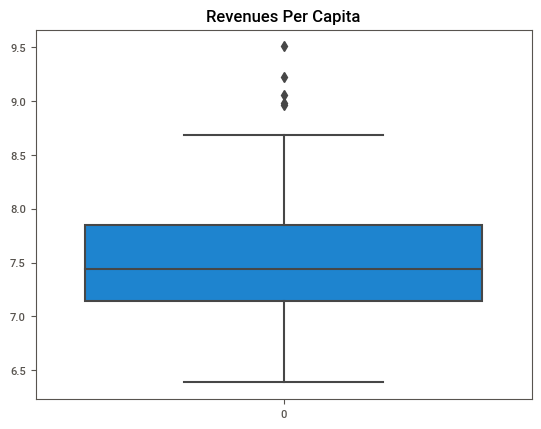

In [236]:
#determine the upper boundary and lower boundary by plotting box plot
# remove outliers from Seaborn boxplots.
# Outlier shown with a dot

df = df_hospital_city_last.copy()

import seaborn as sns 

def boxplot(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = (Q3 - Q1)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return Q1,Q3,IQR,lower_range,upper_range

Q1,Q3,IQR,lower_range,upper_range = boxplot(df['Revenues Per Capita'])
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1.round(2))
print("Second Quartile :",Q3.round(2))
print("IQR Range :",IQR.round(2))
print("Lower Range :",lower_range.round(2))
print("Upper Range :",upper_range.round(2))

sns.boxplot(df['Revenues Per Capita']).set(title='Revenues Per Capita')

Total Range is as folows
Lower Range : 6.08
Upper Range : 8.92
So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS
Total Outlier ABOVE UPPER RANGE : 5
Total Outlier BELOW LOWER RANGE : 0
Total Outlier in the dataset : 5
BOX PLOT VALUES : 
First Quartile : 7.13
Second Quartile : 7.8
IQR Range : 0.67
Lower Range : 6.13
Upper Range : 8.8


[Text(0.5, 1.0, 'Revenues Per Capita')]

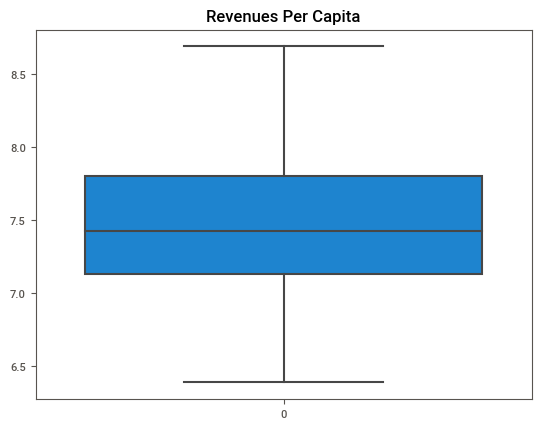

In [237]:
# Upper and Lower Range of the dataset of Revenues Per Capita

upper_outlier = len(df[df['Revenues Per Capita'] > upper_range])
lower_outlier = len(df[df['Revenues Per Capita'] < lower_range])
total = len(df[(df_hospital_city_last['Revenues Per Capita']  < lower_range) | (df['Revenues Per Capita']  > upper_range)])

print("Total Range is as folows")
print("Lower Range :",lower_range.round(2))
print("Upper Range :", upper_range.round(2))
print("So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS")
print("Total Outlier ABOVE UPPER RANGE :",upper_outlier)
print("Total Outlier BELOW LOWER RANGE :",lower_outlier)
print("Total Outlier in the dataset :", total)

# remove outliers
df = df[(df['Revenues Per Capita']  > lower_range) & (df['Revenues Per Capita']  < upper_range)]

# Upper and Lower Range of the dataset of Expenditures Per Capita

Q1,Q3,IQR,lower_range,upper_range = boxplot(df['Revenues Per Capita'])
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1.round(2))
print("Second Quartile :",Q3.round(2))
print("IQR Range :",IQR.round(2))
print("Lower Range :",lower_range.round(2))
print("Upper Range :",upper_range.round(2))

sns.boxplot(df['Revenues Per Capita']).set(title='Revenues Per Capita')

Total Range is as folows
Lower Range : 6.13
Upper Range : 8.8
So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS
Total Outlier ABOVE UPPER RANGE : 0
Total Outlier BELOW LOWER RANGE : 0
Total Outlier in the dataset : 0
BOX PLOT VALUES : 
First Quartile : 7.12
Second Quartile : 7.78
IQR Range : 0.67
Lower Range : 6.12
Upper Range : 8.78


[Text(0.5, 1.0, 'Expenditures Per Capita')]

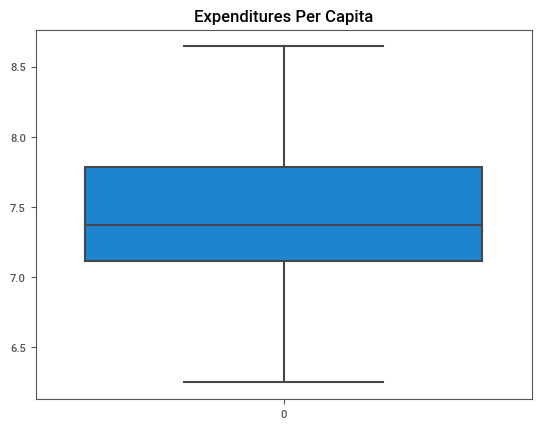

In [238]:
# Upper and Lower Range of the dataset of Revenues Per Capita

upper_outlier = len(df[df['Expenditures Per Capita'] > upper_range])
lower_outlier = len(df[df['Expenditures Per Capita'] < lower_range])
total = len(df[(df_hospital_city_last['Expenditures Per Capita']  < lower_range) | (df['Revenues Per Capita']  > upper_range)])

print("Total Range is as folows")
print("Lower Range :",lower_range.round(2))
print("Upper Range :", upper_range.round(2))
print("So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS")
print("Total Outlier ABOVE UPPER RANGE :",upper_outlier)
print("Total Outlier BELOW LOWER RANGE :",lower_outlier)
print("Total Outlier in the dataset :", total)

# remove outliers
df = df[(df['Revenues Per Capita']  > lower_range) & (df['Revenues Per Capita']  < upper_range)]

# Upper and Lower Range of the dataset of Expenditures Per Capita

Q1,Q3,IQR,lower_range,upper_range = boxplot(df['Expenditures Per Capita'])
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1.round(2))
print("Second Quartile :",Q3.round(2))
print("IQR Range :",IQR.round(2))
print("Lower Range :",lower_range.round(2))
print("Upper Range :",upper_range.round(2))

sns.boxplot(df['Expenditures Per Capita']).set(title='Expenditures Per Capita')

In [239]:
df.shape

(164, 9)

# Regression Analysis

In [258]:
## Standard OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols
y = df_hospital_city_last['EHR Per Capita']
x = df_hospital_city_last['Revenues Per Capita']
z = df_hospital_city_last['Expenditures Per Capita']

model = ols('y ~ x + z', data = df_hospital_city_last).fit()
table = sm.stats.anova_lm(model)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6930
Date:                Sat, 10 Dec 2022   Prob (F-statistic):              0.501
Time:                        11:46:55   Log-Likelihood:                -297.36
No. Observations:                 169   AIC:                             600.7
Df Residuals:                     166   BIC:                             610.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8118      1.423      3.381      0.0

### Plot the histograms

Text(0.5, 1.0, 'Revenue per Capita')

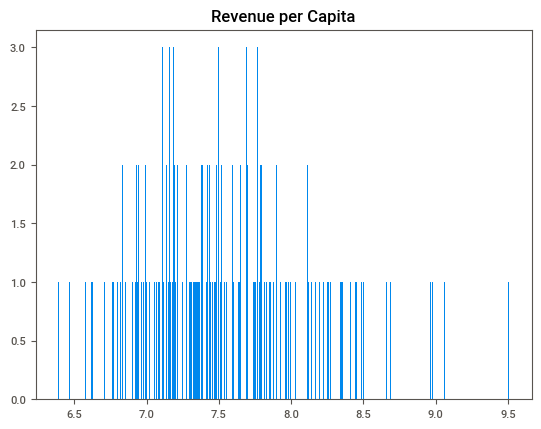

In [198]:
## plot the histogram for revenue per capita
## plot the histogram for revenue per capita
plt.hist(df_hospital_city_last['Revenues Per Capita'], bins=500)
plt.title('Revenue per Capita')

Text(0.5, 1.0, 'Expenditures per Capita')

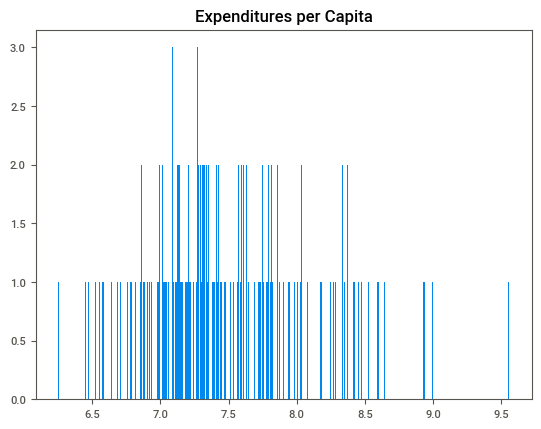

In [199]:
## plot the histogram for expenditure per capita
## plot the histogram for expenditure per capita
plt.hist(df_hospital_city_last['Expenditures Per Capita'], bins=500)
plt.title('Expenditures per Capita')

Text(0.5, 1.0, 'EHR Per Capita')

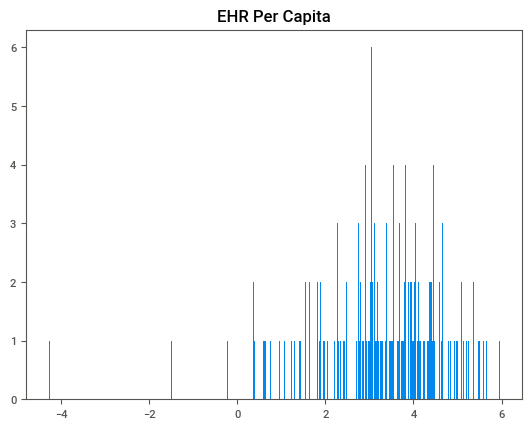

In [200]:
## plot the histogram for EHR per Capita
plt.hist(df_hospital_city_last['EHR Per Capita'], bins=500)
plt.title('EHR Per Capita')


<AxesSubplot: xlabel='EHR Per Capita', ylabel='Density'>

<Figure size 1600x480 with 0 Axes>

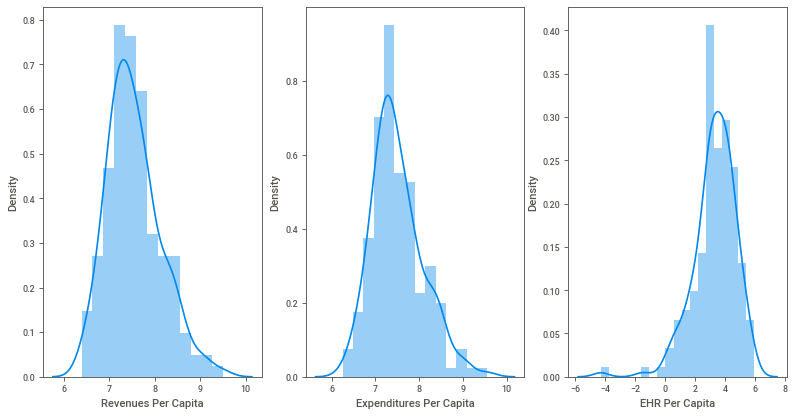

In [201]:
# Plot the Distribution plots for the features
# Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)

warnings.filterwarnings('ignore')
figure(figsize=(12, 6), dpi=80)
plt.subplot(1,3,1)
sns.distplot(df_hospital_city_last['Revenues Per Capita'])
plt.subplot(1,3,2)
sns.distplot(df_hospital_city_last['Expenditures Per Capita'])
plt.subplot(1,3,3)
sns.distplot(df_hospital_city_last['EHR Per Capita']) # right skewed distribution -> log transformation

In [259]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

## Regression Analysis

LinearRegression()

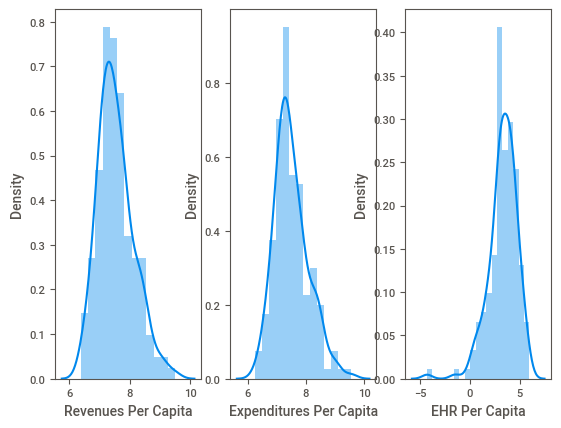

In [260]:
# Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
plt.subplot(1,3,1)
sns.distplot(df_hospital_city_last['Revenues Per Capita'])
plt.subplot(1,3,2)
sns.distplot(df_hospital_city_last['Expenditures Per Capita'])
plt.subplot(1,3,3)
sns.distplot(df_hospital_city_last['EHR Per Capita']) # right skewed distribution
# ================================================
# Build the model
# ================================================

# Training data
X = df_hospital_city_last[['Revenues Per Capita', 'Expenditures Per Capita']] # feature 
y = df_hospital_city_last['EHR Per Capita'] # target

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Train the model: include an intercept to the model by default
model = LinearRegression()
model.fit(X_train, y_train)

In [261]:
## Standard OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols

y = df_hospital_city_last['EHR Per Capita']
x = df_hospital_city_last['Revenues Per Capita']
z = df_hospital_city_last['Expenditures Per Capita']

model = ols('y ~ x + z', data = df_hospital_city_last).fit()
table = sm.stats.anova_lm(model)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6930
Date:                Sat, 10 Dec 2022   Prob (F-statistic):              0.501
Time:                        11:47:30   Log-Likelihood:                -297.36
No. Observations:                 169   AIC:                             600.7
Df Residuals:                     166   BIC:                             610.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8118      1.423      3.381      0.0

In [265]:
y_pred = model.predict(X_test)

# Comparing the test values and the predicted values
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df.head()

,Actual,Predicted
104,4.998501,2.909344
75,5.954865,3.008800
122,3.488749,2.669342
96,5.240100,3.478715
46,4.423066,2.880936


In [266]:
import hvplot.pandas
pd.DataFrame({'True Values(y test)': y_test, 'Predicted Values': y_pred}).hvplot.scatter(x='True Values(y test)', y='Predicted Values')

:Scatter   [True Values(y test)]   (Predicted Values)

In [267]:
# coefficient
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Revenues Per Capita,0.024126
Expenditures Per Capita,0.380432


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Revenues Per Capita and Expenditures Per Capita is associated with an increase of 11.678199 and a decrease of -7.991750 in EHR per capita respectively.

### Check the distribution of the error terms

In [268]:
# Residual Histogram
pd.DataFrame({'Error Values': (y_test - y_pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

Check the distribution of the error terms
In linear regression we assume that the error term follows normal distribution. So we have to check this assumption before we can use the model for making predictions. We check this by looking at the histogram of the error term visually, making sure that the error terms are normally distributed around zero and that the left and right side are broadly similar.

### Evaluate the regression

In [269]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [270]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1.1556201019649461
MSE: 1.941815526647848
RMSE: 1.3934904113942974
R2 Square -0.6228104968873527
__________________________________


In [274]:
#  don't include an intercept in your model:
model = LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1.1556201019649461
MSE: 1.941815526647848
RMSE: 1.3934904113942974
R2 Square -0.6228104968873527
__________________________________


# Comparing machine learning models

In [121]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [272]:
decision_tree = DecisionTreeRegressor(max_depth=11)
random_forest = RandomForestRegressor(criterion='squared_error', n_estimators=500, oob_score=True, random_state=100)
svr = SVR(verbose=True, kernel='rbf', C=1)  
ransacr = RANSACRegressor(min_samples=78, max_trials=1,random_state=42)
sgd = SGDRegressor(n_iter_no_change=250, tol=1e-100, eta0=0.00003, max_iter=100000,random_state=42)
adaboost = AdaBoostRegressor(random_state=66)
linear = LinearRegression()

decision_tree.fit(X_train,y_train)
random_forest.fit(X_train,y_train)
svr.fit(X_train,y_train)
ransacr.fit(X_train,y_train)
sgd.fit(X_train,y_train)
adaboost.fit(X_train,y_train)
linear.fit(X_train,y_train);

#  train dataset 
decision_tree_preds = decision_tree.predict(X_train)
random_forest_preds = random_forest.predict(X_train)
svr_preds = svr.predict(X_train)
ransacr_preds = ransacr.predict(X_train)
sgd_preds = sgd.predict(X_train)
adaboost_preds = adaboost.predict(X_train)
linear_preds = linear.predict(X_train)

results_df = pd.DataFrame([])

for label, preds in [('Decision Tree', decision_tree_preds),
                     ('Random Forest', random_forest_preds),
                     ('Support Vector Regression',svr_preds),
                     ('Random Sample Consensus',ransacr_preds),
                     ('Stochastic Gradient Descent',sgd_preds),
                     ('Adaboost',      adaboost_preds),
                     ('Linear',        linear_preds)]:
    
    r2 = r2_score(y_train, preds)
    mse = mean_squared_error(y_train, preds)
    mae = mean_absolute_error(y_train, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, preds))
    
    results_df_2 = pd.DataFrame(data=[[label, r2, mse, mae, rmse]],
                          columns=['Model', 'R2 Square', 'MSE', 'MAE', 'RMSE'])
    results_df = results_df.append(results_df_2, ignore_index=True)

    print('\n  --- {} on training data ---'.format(label))
    print('           R2 Score: {:.3}'.format(r2))
    print(' Mean Squared Error: {:.3}'.format(mse))
    print('Mean Absolute Error: {:.3}'.format(mae))
    print('Root Mean Square Error: {:.3}'.format(rmse))

[LibSVM]*
optimization finished, #iter = 94
obj = -113.693788, rho = -3.179869
nSV = 106, nBSV = 99

  --- Decision Tree on training data ---
           R2 Score: 0.989
 Mean Squared Error: 0.0241
Mean Absolute Error: 0.0429
Root Mean Square Error: 0.155

  --- Random Forest on training data ---
           R2 Score: 0.842
 Mean Squared Error: 0.344
Mean Absolute Error: 0.438
Root Mean Square Error: 0.586

  --- Support Vector Regression on training data ---
           R2 Score: 0.0185
 Mean Squared Error: 2.13
Mean Absolute Error: 1.05
Root Mean Square Error: 1.46

  --- Random Sample Consensus on training data ---
           R2 Score: 0.00135
 Mean Squared Error: 2.17
Mean Absolute Error: 1.08
Root Mean Square Error: 1.47

  --- Stochastic Gradient Descent on training data ---
           R2 Score: -0.0413
 Mean Squared Error: 2.26
Mean Absolute Error: 1.12
Root Mean Square Error: 1.5

  --- Adaboost on training data ---
           R2 Score: 0.468
 Mean Squared Error: 1.16
Mean Absolut

In [123]:
np.mean(cross_val_score(linear, X_train, y_train, cv=5))

-0.07786003272700284

In [124]:
np.mean(cross_val_score(decision_tree, X, y, cv=5))

-1.5223274831575484

# Kruskal-Wallis Test

In [130]:
# Importing required library
from scipy.stats import kruskal

# Perform Kruskal Wallis Test
group_data = df_hospital_city_last.groupby('Business_City')['EHR Per Capita'].apply(list).to_dict()

result = stats.kruskal(*group_data.values())
result

KruskalResult(statistic=163.0, pvalue=0.48526877720984435)

In [131]:
#Interpretation of the results at 5% level of significance
# Level of significance
alpha = 0.05
if result.pvalue < alpha:
    print('Reject Null Hypothesis (Different distribution')
else:
    print('Do not Reject Null Hypothesis (Same distribution)')


Do not Reject Null Hypothesis (Same distribution)


# Spearman's rank correlation coefficient

In [133]:
from scipy import stats
result = stats.spearmanr(df_hospital_city_last['EHR Per Capita'],df_hospital_city_last['Revenues Per Capita'] )
print(result)
#Interpretation of the results at 5% level of significance
# Level of significance
alpha = 0.05
if result.pvalue < alpha:
    print('Reject Null Hypothesis')
else:
    print('Do not Reject Null Hypothesis')


SpearmanrResult(correlation=-0.06041800855237208, pvalue=0.44218285794454437)
Do not Reject Null Hypothesis


In [134]:
result = stats.spearmanr(df_hospital_city_last['EHR Per Capita'],df_hospital_city_last['Expenditures Per Capita'] )
print(result)
#Interpretation of the results at 5% level of significance
# Level of significance
alpha = 0.05
if result.pvalue < alpha:
    print('Reject Null Hypothesis')
else:
    print('Do not Reject Null Hypothesis')

SpearmanrResult(correlation=-0.06955382630398146, pvalue=0.37616581553261996)
Do not Reject Null Hypothesis


In [136]:
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(df_hospital_city_last['EHR Per Capita'], df_hospital_city_last['Expenditures Per Capita'], df_hospital_city_last['Revenues Per Capita'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=137.280, p=0.000
Different distributions (reject H0)


In [137]:
(np.abs(y_train)).mean() 

58.42996661582099

In [141]:
from scipy.stats import friedmanchisquare
data1, data2, data3 = df_hospital_city_last['EHR Per Capita'], df_hospital_city_last['Revenues Per Capita'], df_hospital_city_last['Expenditures Per Capita'] 
stat, p = friedmanchisquare(data1, data2, data3)

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
    
    

Statistics=137.280, p=0.000
Different distributions (reject H0)
